# 基于深度强化学习的单智能体决策过程方法研究————任务二：强化学习过程20240122

我们将模仿文章：A UAV Path Planning Method in Three-Dimensional Urban Airspace based on Safe Reinforcement Learning，进行相关设计

引用：

Li Y, Zhang X, Zhu Y, Gao Z. A UAV Path Planning Method in Three-Dimensional Urban Airspace based on Safe Reinforcement Learning. 2023 IEEE/AIAA 42nd Digital Avionics Systems Conference (DASC), Digital Avionics Systems Conference (DASC), 2023 IEEE/AIAA 42nd. October 2023:1-7. doi:10.1109/DASC58513.2023.10311219

网址：

https://ieeexplore.ieee.org/document/10311219

### 1. 单无人机路径规划

在该任务中，无人机明确自己的当前位置和终点位置，无人机需要前往终点位置，但要注意以下要点：  
- 必须要避开障碍物；
- 要尽可能快或尽可能省电  
让我们创建一个环境进行强化学习训练吧

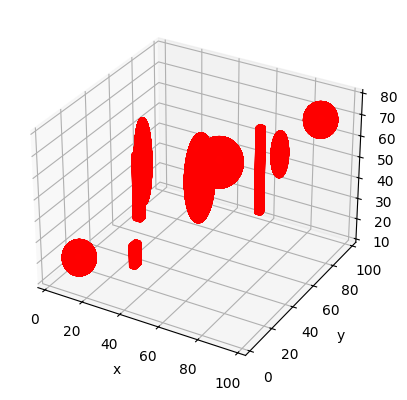

In [1]:
import sys
sys.path.append('..')
import UAVENVmudule_design as UE

# 构建障碍物
cuboid1 = {"type":"sphere","feature_points":[[10, 10, 20],[7]]}
cuboid2 = {"type":"cuboid","feature_points":[[30, 30, 50],[3, 3, 30]]}
cuboid3 = {"type":"spheroid","feature_points":[[50, 50, 50],[5, 9, 20]]}
cuboid4 = {"type":"cuboid","feature_points":[[70, 70, 50],[2, 2, 40]]}
cuboid5 = {"type":"sphere","feature_points":[[90, 90, 70],[7]]}
cuboid6 = {"type":"spheroid","feature_points":[[20, 50, 50],[3, 4, 20]]}
cuboid7 = {"type":"cuboid","feature_points":[[40, 10, 30],[2, 4, 10]]}
cuboid8 = {"type":"sphere","feature_points":[[60, 50, 60],[10]]}
cuboid9 = {"type":"spheroid","feature_points":[[80, 70, 60],[3, 4, 10]]}

envlist = [cuboid1, cuboid2, cuboid3, cuboid4, cuboid5, cuboid6, cuboid7, cuboid8, cuboid9]

env = UE.solid_env(envlist)
env.show_solid_env()
# 注意：代码运行时间约4min

f:\desk\Design-of-Simple-Python-UAV-Env\tasks_design\..\UAVENVmudule_design\env_design\env.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap=cm.coolwarm, edgecolor='k')


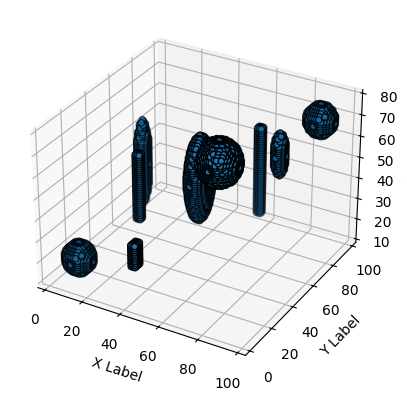

In [2]:
# 离散化
env_discretizing = UE.solid_env_discretizing(env, [0,100], [0,100], [0,100], dx=1)
env_discretizing.show_discretized_env()

In [3]:
env_discretizied = env_discretizing.get_discetized_env()

让我们将上述环境信息保存下来

In [4]:
import pickle
with open("env_discretizing.pkl", "wb") as file:
    pickle.dump(env_discretizing, file)
# 注意：运行时间~15s

我们将采用不同的方法策略，完成无人机的路径规划：  
- <sup><a href="task3_1_shortestway_intro.ipynb">最短路径的引导</a></sup>